# Taller 1

**Por:** Juan Pablo Gaviria Salazar

## Calentamiento

In [48]:
# Importacion de librerias
import pandas as pd
import numpy as np
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sb
from sklearn import tree
from sklearn import model_selection
import matplotlib.pyplot as plt

In [2]:
# Definicion del conjunto de datos
data = pd.read_csv('data_calentamiento.csv', names=['x1','x2','y'])
data

,x1,x2,y
0,0.8,0.8,1
1,0.8,1.2,1
2,3.8,2.8,2
3,4.2,3.2,2
4,1.0,1.0,1
5,1.2,1.2,1
6,4.2,2.8,2
7,4.4,2.8,2
8,3.5,1.0,3
9,4.0,1.0,3


In [3]:
# Definicion de la funcion clasificadora
# Se realiza la clasificacion con distancia euclidea
def kClasificador(data,k,x1,x2):
    distanciaX1 = np.power(x1-data.x1.values,2)
    distanciaX2 = np.power(x2-data.x2.values,2)
    distanciaEuc = np.sqrt(distanciaX2+distanciaX1)
    minKElements = np.argpartition(distanciaEuc, k)
    minKElements = minKElements[:k]
    yValues = data.y.values[minKElements]
    return mode(yValues).mode

### Precisión del conjunto de entrenamiento

In [4]:
# Evaluacion del conjunto de entrenamiento
evaluacion = []
aciertos = 0
k = 2
for i in range(data.x1.size):
    resultado = kClasificador(data, k, data.x1.values[i], data.x2.values[i])
    evaluacion.append(resultado)
    if(data.y.values[i] == resultado):
        aciertos += 1
error = 1 - (aciertos/data.y.size)
print('Error en el conjunto de entrenamiento: {0:.1%}'.format(error))

Error en el conjunto de entrenamiento: 0.0%


### Precision de un punto

In [5]:
# Evaluacion del punto P=(3.0,2.0)
evaluacion = kClasificador(data, k, 3, 2)
print('La clasificacion de la observación (3.0, 2,0) es ' + str(evaluacion))

La clasificacion de la observación (3.0, 2,0) es [2]


Este punto con k=2 saca error, debido a que se presenta empate

### Valor de k con mayor precisión

In [6]:
# Se evalua el conjunto de entrenamiento con diferentes k
ks = [1, 2, 3, 4, 5, 6]
precisiones = []
for k in ks:
    aciertos = 0
    for i in range(data.x1.size):
        resultado = kClasificador(data, k, data.x1.values[i], data.x2.values[i])
        if(data.y.values[i] == resultado):
            aciertos += 1
    precisiones.append(1-(aciertos/data.y.size))
precisiones = ['{0:.1%}'.format(prec) for prec in precisiones]
tablaEvaluacion = pd.DataFrame({"k":ks,"Error":precisiones})
tablaEvaluacion


,k,Error
0,1,0.0%
1,2,0.0%
2,3,0.0%
3,4,0.0%
4,5,0.0%
5,6,0.0%


### Distancias ponderadas

In [7]:
# Se crea metodo de knn con distancias ponderadas
def kClasificadorPonderado(data,k,x1,x2):
    distanciaX1 = np.power(x1-data.x1.values,2)
    distanciaX2 = np.power(x2-data.x2.values,2)
    distanciaEuc = np.sqrt(distanciaX2+distanciaX1)
    minKElements = np.argpartition(distanciaEuc,k)
    minKElements = minKElements[:k]
    dk = minKElements[k-1]
    d1 = minKElements[0]
    if(distanciaEuc[dk] == distanciaEuc[d1]):
        yValues = data.y.values[minKElements]
        result = mode(yValues).mode[0]
    else:
        w = {}
        for element in minKElements:
            weight = (distanciaEuc[dk]-distanciaEuc[element])/(distanciaEuc[dk]-distanciaEuc[d1])
            yvalue = data.y.values[element]
            w[yvalue] = w.get(yvalue,0)+weight
        result = max(w, key=w.get)
    return result

In [8]:
k=5
x1=3
x2=2
result = kClasificadorPonderado(data,k,x1,x2)
print('Y resultado: '+str(result))

Y resultado: 3


## 3 Implementación KNN

### Evaluación con los datos de entrenamiento

In [9]:
# Instanciacion del modelo
k = 2
knn = KNeighborsClassifier(k)
x_train = pd.DataFrame({"x1":data.x1, "x2":data.x2})
knn.fit(x_train,data.y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [10]:
# Evaluacion con el conjunto de entrenamiento
print('Precisión sobre el conjunto de entrenamiento: {0:.1%}'
     .format(knn.score(x_train, data.y)))

Precisión sobre el conjunto de entrenamiento: 100.0%


### Evaluación con Datos Fisher

In [11]:
# Lectura de información
datos = pd.read_csv('datos.txt')
datos.head()

,genero,estatura,peso,long_pie,long_brazo,ancho_espalda,diam_craneo,long_rod_tob
0,0,159,49,36.0,68.0,42.0,57.0,40.0
1,1,164,62,39.0,73.0,44.0,55.0,44.0
2,0,172,65,38.0,75.0,48.0,58.0,44.0
3,0,167,52,37.0,73.0,41.5,58.0,44.0
4,0,164,51,36.0,71.0,44.5,54.0,40.0


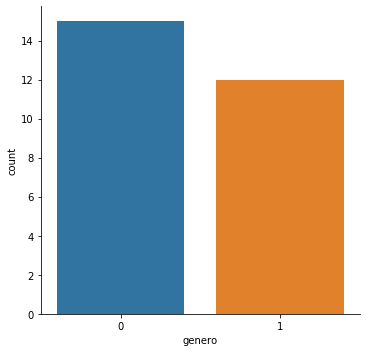

In [17]:
# Descripción de los datos
sb.factorplot('genero',data=datos,kind='count')

In [12]:
# Se crea las variables de entrenamiento
x_test = datos.drop('genero', axis=1)
y_test = datos.genero

In [13]:
# Se evalua el conjunto de entrenamiento con diferentes k
ks = [1, 2, 3, 4, 5, 6, 7, 8]
precisiones = []
for k in ks:
    knn = KNeighborsClassifier(k)
    knn.fit(x_test, y_test)
    precisiones.append(knn.score(x_test, y_test))
indMax = precisiones.index(max(precisiones))
precisiones = ['{0:.1%}'.format(prec) for prec in precisiones]
tablaEvaluacion = pd.DataFrame({"k":ks,"Precisión":precisiones})
tablaEvaluacion

,k,Precisión
0,1,100.0%
1,2,92.6%
2,3,88.9%
3,4,88.9%
4,5,92.6%
5,6,92.6%
6,7,92.6%
7,8,92.6%


In [14]:
print('El k con mayor precisión sobre el conjunto de entrenamiento es k={:d} con precisión del {:s}'
    .format(tablaEvaluacion['k'].values[indMax], tablaEvaluacion['Precisión'].values[indMax]))

El k con mayor precisión sobre el conjunto de entrenamiento es k=1 con precisión del 100.0%


### 4. Implementación Arbol de decisión

In [35]:
# Se crea el arbol de descisión
decision_tree = tree.DecisionTreeClassifier()
x = datos.drop('genero', axis=1)
y = datos.genero

Se itera con el tamaño del conjunto de test, iniciando con un test del 95% y rebajando en un 1% hasta llegar a un overfitting de colocar todo el conjunto de datos como entrenamiento

In [60]:
testSize = 0.95
resumenAcc = pd.DataFrame(columns=['Size of trainig Set', 'Train Accuracy', 'Test Accuracy'])
while(testSize > 0):
    # Se divide el conjunto de entrenamiento y de test
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = testSize)
    
    # Entrenamiento del arbol de decisión
    decision_tree.fit(x_train, y_train)
    
    # Precisión en el conjunto de entrenamiento y de test
    trainAcc = round(decision_tree.score(x_train, y_train)*100,2)
    testAcc = round(decision_tree.score(x_test, y_test)*100,2)
    resumenAcc.loc[len(resumenAcc)] = [(1-testSize)*100,trainAcc, testAcc]

    testSize = testSize-0.01

In [61]:
resumenAcc

,Size of trainig Set,Train Accuracy,Test Accuracy
0,5.0,100.0,42.31
1,6.0,100.0,42.31
2,7.0,100.0,53.85
3,8.0,100.0,80.00
4,9.0,100.0,52.00
...,...,...,...
90,95.0,100.0,100.00
91,96.0,100.0,50.00
92,97.0,100.0,100.00
93,98.0,100.0,100.00


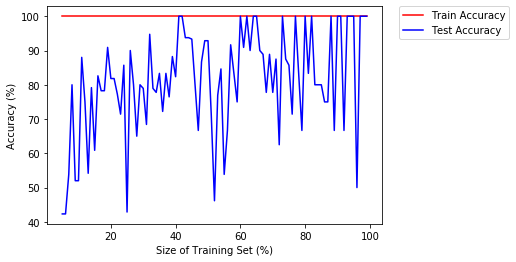

In [62]:
plt.plot(resumenAcc['Size of trainig Set'],resumenAcc['Train Accuracy'], 'r-', label='Train Accuracy')
plt.plot(resumenAcc['Size of trainig Set'], resumenAcc['Test Accuracy'], 'b-', label='Test Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Size of Training Set (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Como se puede ver en la gráfica, no hay un patron claro en el que se pueda predecir el comportamiento de un Set de entrenamiento mayor o menor.